In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = \
    train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
def model_fn(a_layer = None):
    model = Sequential()
    model.add(Flatten(input_shape = (28, 28)))
    model.add(Dense(100, activation = 'relu'))

    if a_layer:
        model.add(a_layer)

    model.add(Dense(10, activation = 'softmax'))

    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


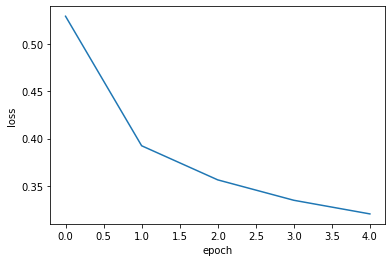

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

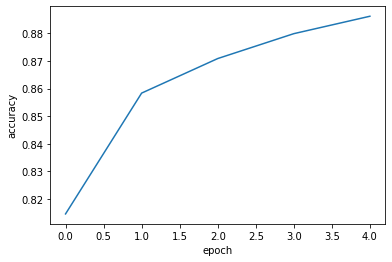

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

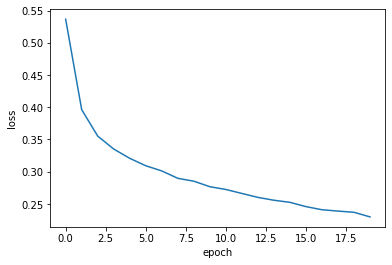

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


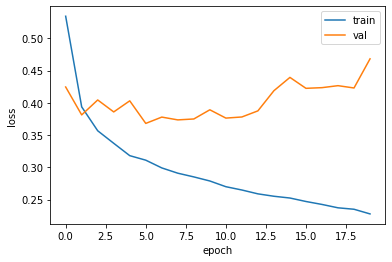

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

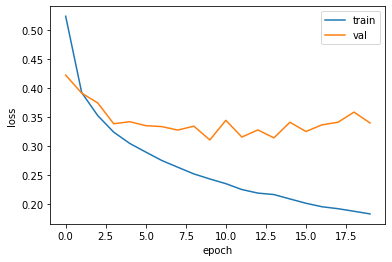

In [13]:
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
from tensorflow.keras.layers import Dropout
model = model_fn(Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


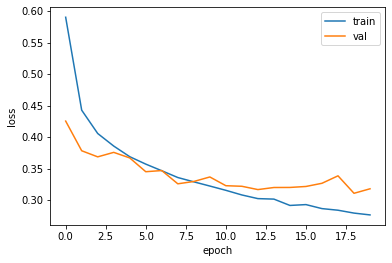

In [15]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model = model_fn(Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [17]:
model.save_weights('model-weights.h5')

In [18]:
model.save('model-whole.h5')

In [19]:
!ls -la *.h5

-rw-r--r-- 1 root root 332480 Aug 29 10:55 model-weights.h5
-rw-r--r-- 1 root root 981736 Aug 29 10:55 model-whole.h5


In [20]:
model = model_fn(Dropout(0.3))
model.load_weights('model-weights.h5')

In [21]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8744166666666666


In [22]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8744


[0.3430020213127136, 0.8744166493415833]

In [23]:
model = model_fn(Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

In [24]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8861


[0.3179953098297119, 0.8860833048820496]

In [25]:
model = model_fn(Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [26]:
print(early_stopping_cb.stopped_epoch)

10


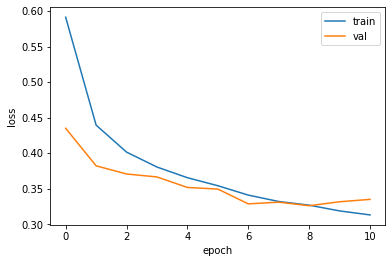

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8809


[0.32622620463371277, 0.8809166550636292]